In [2]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
client = pymongo.MongoClient("mongodb://localhost:27017/") 

mydb = client["DBLP"]
col = mydb['DATA']

In [4]:
dis_cat = col.distinct('Category')
dis_cat.remove('dblp')
dis_cat.remove('i')
dis_cat.remove('sub')
dis_cat.remove('sup')
dis_cat.remove('title')

dis_year = col.distinct('year')

In [20]:
df = pd.DataFrame()
cate_list = []
year_list = []

for i in dis_year:
    temp = col.find({ '$and': [{'Category': {"$exists": True},"year": i } ] },{'Category':1,'_id':0,'year':1} )
    for x in temp:
        cate_list.append(x['Category'])
        year_list.append(x['year'])


df['Category'] = cate_list
df['Year'] = year_list

In [21]:
total_per_year = []
for i in dis_year:
    total_per_year.append(sum(df[df['Year'] == i].value_counts()))

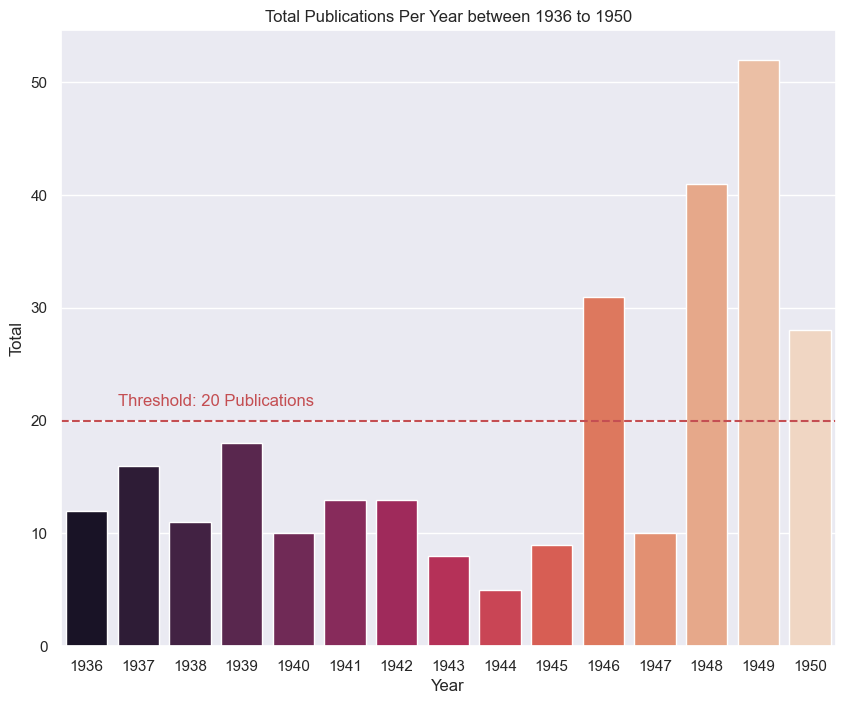

In [77]:
df_yearly = pd.DataFrame()
df_yearly['Year'] = dis_year
df_yearly['Total'] = total_per_year
df_yearly.sort_values(by="Year",inplace=True)

plt.figure(figsize=(10,8))
sns.set(font='Arial')

ax = sns.barplot(x='Year',y='Total', data=df_yearly.head(15),palette="rocket")
ax.set(xlabel='Year', ylabel='Total', title='Total Publications Per Year between 1936 to 1950')

threshold = 20
ax.axhline(y=threshold, color='r', linestyle='--')
ax.text(x=2.5, y=21, s='Threshold: 20 Publications', ha='center', va='bottom', color='r')


plt.show()

In [78]:
bib_count = []
for j in dis_cat:
    bib_count.append(len(list(col.find({ '$and': [{'Category': j,"ee": { "$exists": True }} ] } ))))

In [99]:
for i in range(0,len(bib_count)):
    bib_count[i] = bib_count[i] / 300000

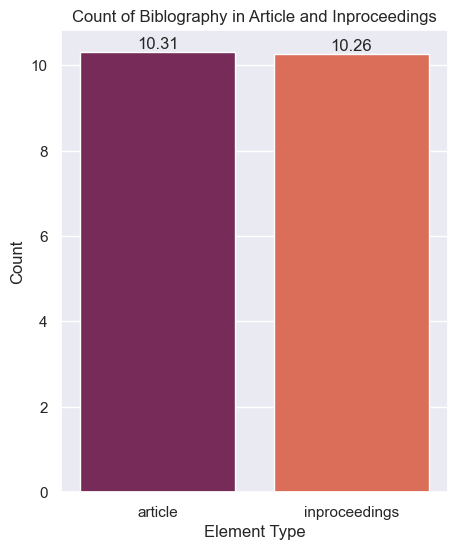

In [155]:
df_bib = pd.DataFrame()
df_bib["Bib"] = dis_cat
df_bib["Count"] = bib_count

df_bib.sort_values(by=["Count"],ascending=False,inplace=True)

plt.figure(figsize=(5,6))
sns.set(font='Arial')

ax = sns.barplot(x='Bib',y='Count', data=df_bib.head(2),palette="rocket")
ax.set(xlabel='Element Type', ylabel='Count', title='Count of Biblography in Article and Inproceedings')

for i in ax.containers:
    ax.bar_label(i, label_type='edge',labels=[f'{val:.2f}' if val > 0 else '' for val in i.datavalues])

plt.show()

In [119]:
df_new = pd.DataFrame(columns=dis_cat)
for i in dis_cat:
    publishments_count = []
    for j in dis_year:
        temp = df[df['Year'] == j]
        try:
            publishments_count.append(temp[temp['Category'] == i].value_counts()[0])
        except IndexError:
            publishments_count.append(0)
    df_new[i] = publishments_count

In [134]:
df_new['Year'] = dis_year
df_new = df_new.drop(88)

C:\Users\max55\AppData\Local\Temp\ipykernel_18784\1221832998.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  counts = df_new.groupby(['Year'])['article', 'book', 'data', 'incollection', 'inproceedings', 'mastersthesis', 'phdthesis', 'proceedings', 'www'].sum().tail(15)


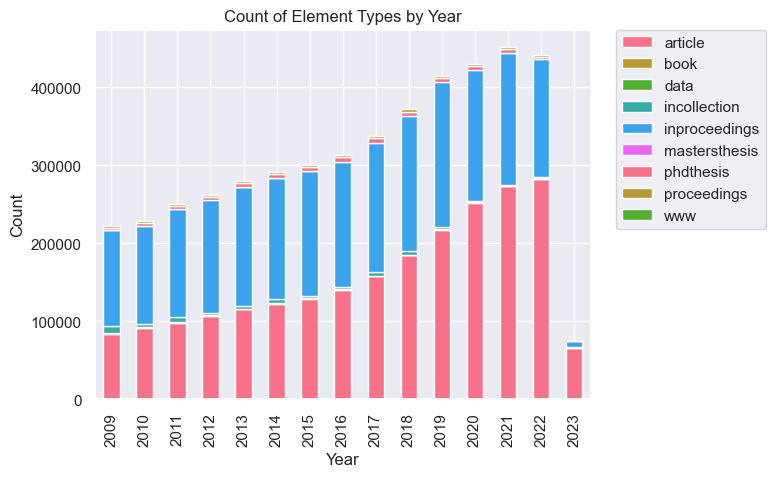

In [135]:
counts = df_new.groupby(['Year'])['article', 'book', 'data', 'incollection', 'inproceedings', 'mastersthesis', 'phdthesis', 'proceedings', 'www'].sum().tail(15)

# Create a stacked bar chart of the counts by year and element type
sns.set_palette('husl')
counts.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Element Types by Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Findings:
Left Skewed Graph which shows that
Inproceedings contributed the most among other publishments as seen in the previous question.

Question 4 
Q) How many phd thesis after 1990? Show with Bar Plot

In [136]:
phd_thesis_years = []
count_phd_per_year = []

for i in dis_year:
    if i > '1990':
        phd_thesis_years.append(i)

for i in phd_thesis_years:
    count_phd_per_year.append(len(list(col.find({ '$and': [{'Category': 'phdthesis',"year": i } ] } ))))

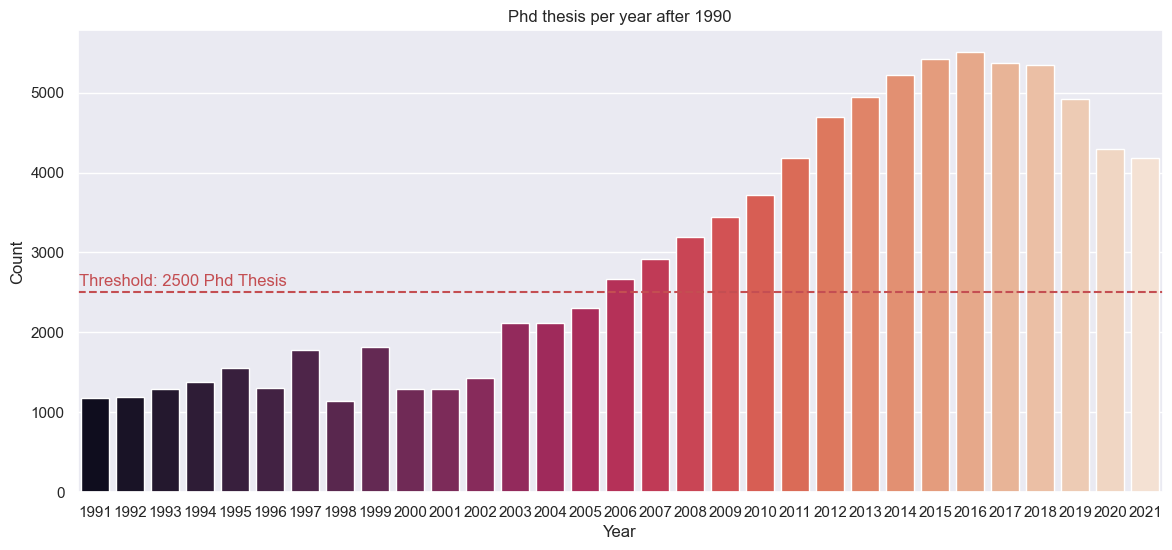

In [153]:
temp_df = pd.DataFrame()
temp_df["Year"] = phd_thesis_years
temp_df["Count"] = count_phd_per_year

temp_df.drop(31,inplace=True)
temp_df.drop(32,inplace=True)
temp_df.drop(33,inplace=True)

plt.figure(figsize=(14,6))
sns.set(font='Arial')

ax = sns.barplot(x='Year',y='Count', data=temp_df,palette="rocket")
ax.set(xlabel='Year', ylabel='Count', title='Phd thesis per year after 1990')

threshold = 2500
ax.axhline(y=threshold, color='r', linestyle='--')
ax.text(x=2.5, y=2540, s='Threshold: 2500 Phd Thesis', ha='center', va='bottom', color='r')


plt.show()

Findings:
We observe a left skewed bimodal graph which tells us that the number of phdthesis steadily increased from 1991-1995 and 2003-2015

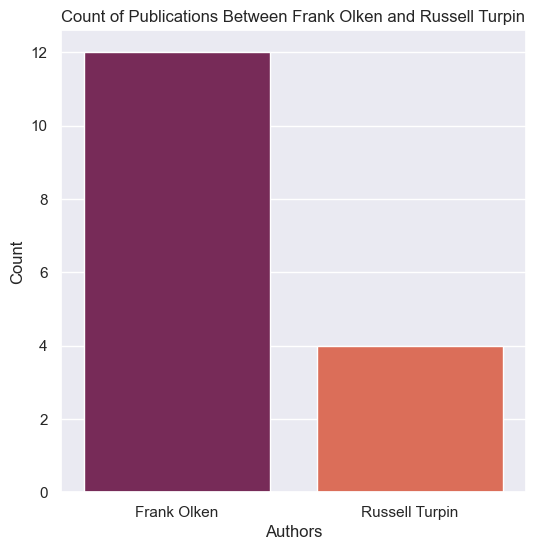

In [5]:
data = pd.DataFrame()
count = []
count.append(len(list(col.find({'author':'Frank Olken'}))))
count.append(len(list(col.find({'author':'Russell Turpin'}))))

labels = ['Frank Olken','Russell Turpin']

data["Authors"] = labels
data["Count"] = count

plt.figure(figsize=(6,6))
sns.set(font='Arial')

ax = sns.barplot(x='Authors',y='Count', data=data,palette="rocket")
ax.set(xlabel='Authors', ylabel='Count', title='Count of Publications Between Frank Olken and Russell Turpin')

plt.show()

Findings:
We can see that Frank Olken has three times more number of publications than Russell Turpin